# Estrutura do Notebook
- Introdução
- Importação de Bibliotecas
- Geração de Dados Sintéticos
- Implementação da Regressão Linear
- Impacto de Outliers
- Importância da Randomização do Dataset
- Impacto da Taxa de Aprendizado
- Importância da Normalização
- Conclusão

## Introdução

Este notebook demonstra a implementação da regressão linear e explora tópicos como o impacto de outliers, taxa de aprendizado, normalização e randomização do dataset.


## 2. Importação de Bibliotecas

In [19]:
import numpy as np
import matplotlib.pyplot as plt

## 3. Geração de Dados Sintéticos

In [26]:
# Função para gerar dados lineares
def generate_linear_data(n_samples=50, noise=1):
    X = 2 * np.random.rand(n_samples, 1)
    y = 4 + 3 * X + np.random.randn(n_samples, 1) * noise
    return X, y

# Gerando dados lineares
X, y = generate_linear_data()

## 4. Implementação da Regressão Linear

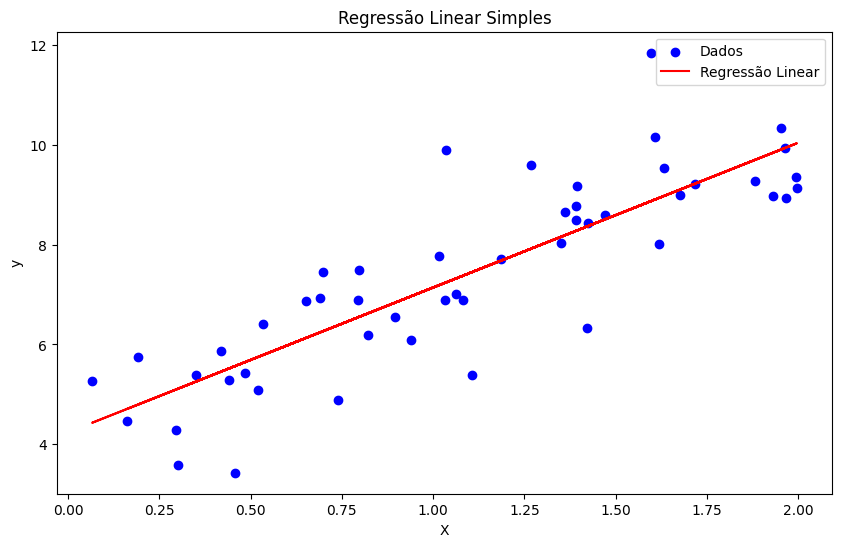

In [21]:
def linear_regression(X, y):
    X_b = np.c_[np.ones((len(X), 1)), X]
    theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    return theta_best

# Treinando o modelo de regressão linear
theta_best = linear_regression(X, y)

# Previsões
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred = X_b.dot(theta_best)

# Plotando os resultados
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Dados')
plt.plot(X, y_pred, color='red', label='Regressão Linear')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regressão Linear Simples')
plt.legend()
plt.show()

## 5. Impacto de Outliers

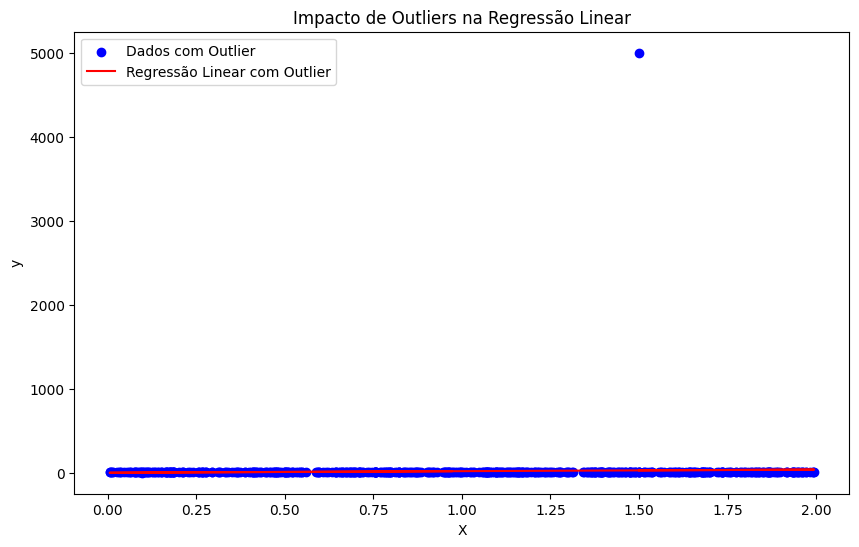

In [24]:
# Adicionando um outlier
X_outlier = np.append(X, [[1.5]], axis=0)
y_outlier = np.append(y, [[5000]], axis=0)

# Treinando o modelo com outlier
theta_best_outlier = linear_regression(X_outlier, y_outlier)

# Previsões com outlier
X_b_outlier = np.c_[np.ones((len(X_outlier), 1)), X_outlier]
y_pred_outlier = X_b_outlier.dot(theta_best_outlier)

# Plotando os resultados com outlier
plt.figure(figsize=(10, 6))
plt.scatter(X_outlier, y_outlier, color='blue', label='Dados com Outlier')
plt.plot(X_outlier, y_pred_outlier, color='red', label='Regressão Linear com Outlier')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Impacto de Outliers na Regressão Linear')
plt.legend()
plt.show()

## 6. Importância da Randomização do Dataset


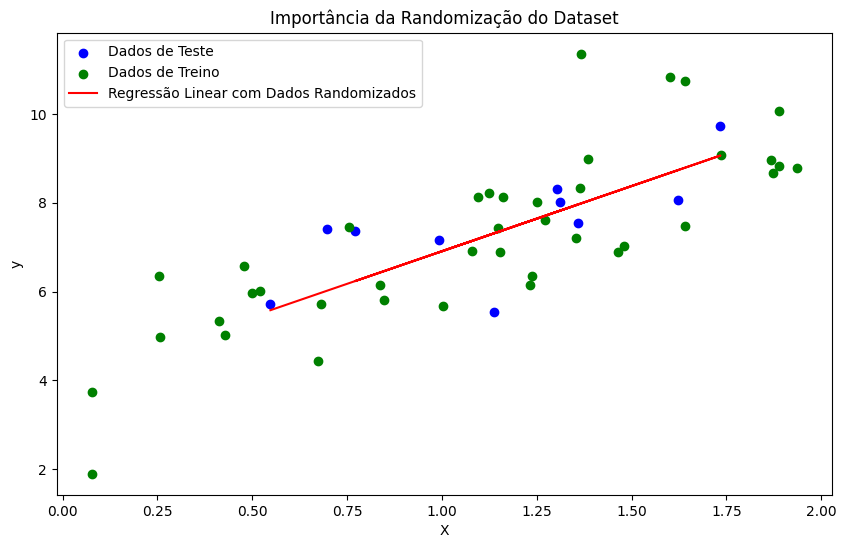

In [27]:
# Dividindo o dataset em treino e teste
def train_test_split(X, y, test_size=0.2, random_state=None):
    if random_state:
        np.random.seed(random_state)
    indices = np.random.permutation(len(X))
    test_size = int(len(X) * test_size)
    test_indices = indices[:test_size]
    train_indices = indices[test_size:]
    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinando o modelo com dados randomizados
theta_best_random = linear_regression(X_train, y_train)

# Previsões com dados randomizados
X_b_test = np.c_[np.ones((len(X_test), 1)), X_test]
y_pred_random = X_b_test.dot(theta_best_random)

# Plotando os resultados com dados randomizados
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Dados de Teste')
plt.scatter(X_train, y_train, color='green', label='Dados de Treino')
plt.plot(X_test, y_pred_random, color='red', label='Regressão Linear com Dados Randomizados')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Importância da Randomização do Dataset')
plt.legend()
plt.show()


## 7. Impacto da Taxa de Aprendizado
 Simulação do impacto da taxa de aprendizado

 Aqui, utilizamos um exemplo simplificado para ilustrar o conceito



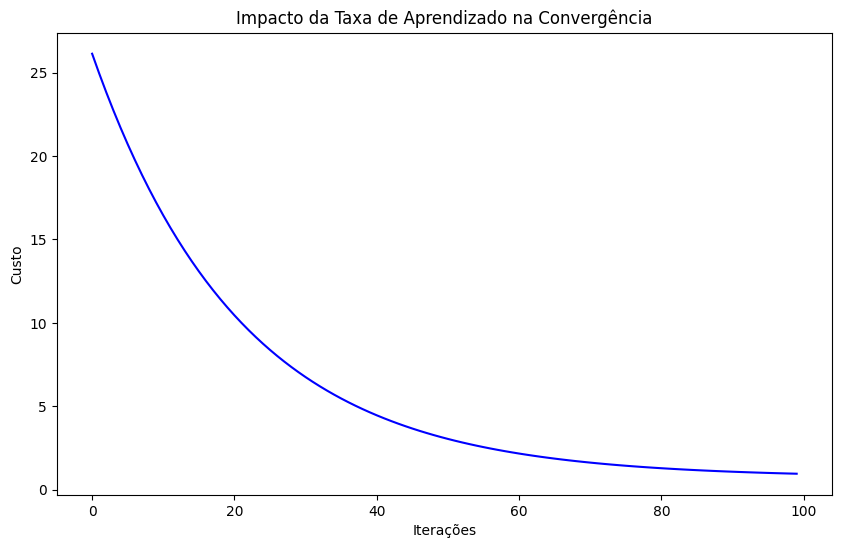

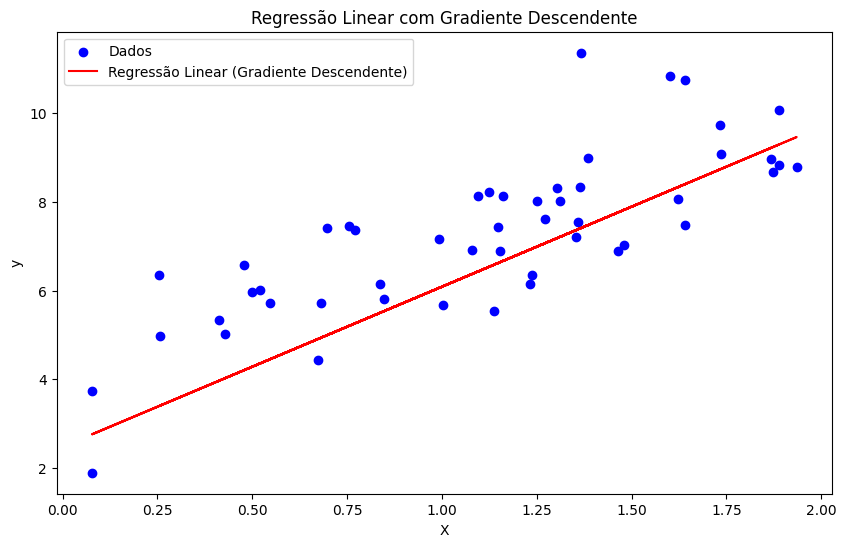

In [31]:
# Função de custo
def compute_cost(X, y, theta):
    m = len(y)
    return (1/(2*m)) * np.sum((X.dot(theta) - y)**2)

# Gradiente descendente
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        theta = theta - (1/m) * learning_rate * (X.T.dot(X.dot(theta) - y))
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history

# Adicionando uma coluna de 1s para o intercepto
X_b = np.c_[np.ones((len(X), 1)), X]

# Inicializando parâmetros
theta = np.random.randn(2, 1)
learning_rate = 0.01
iterations = 100

# Executando o gradiente descendente
theta_best_gd, cost_history = gradient_descent(X_b, y, theta, learning_rate, iterations)

# Plotando a função de custo
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), cost_history, color='blue')
plt.xlabel('Iterações')
plt.ylabel('Custo')
plt.title('Impacto da Taxa de Aprendizado na Convergência')
plt.show()

# Plotando os resultados da regressão linear com gradiente descendente
y_pred_gd = X_b.dot(theta_best_gd)
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Dados')
plt.plot(X, y_pred_gd, color='red', label='Regressão Linear (Gradiente Descendente)')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regressão Linear com Gradiente Descendente')
plt.legend()
plt.show()

## 8. Importância da Normalização


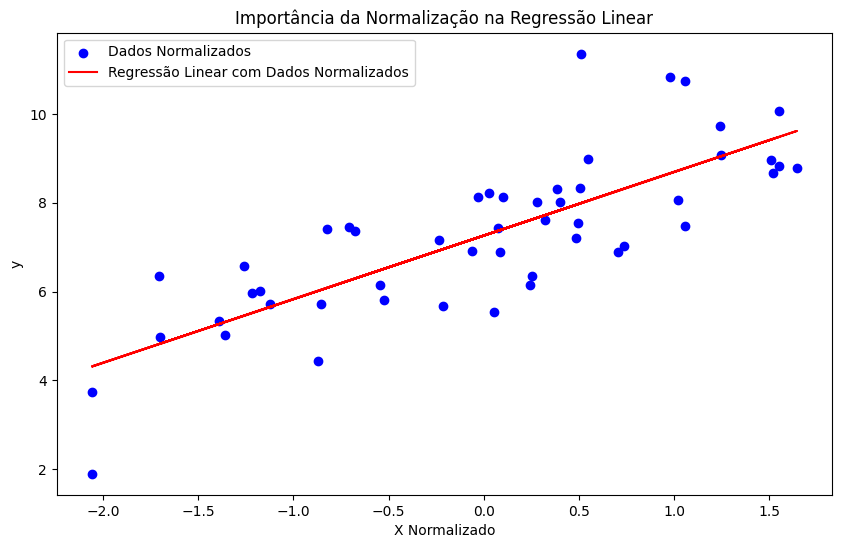

In [32]:
# Normalizando os dados manualmente
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_scaled = (X - X_mean) / X_std

# Treinando o modelo com dados normalizados
theta_best_scaled = linear_regression(X_scaled, y)

# Previsões com dados normalizados
X_b_scaled = np.c_[np.ones((len(X_scaled), 1)), X_scaled]
y_pred_scaled = X_b_scaled.dot(theta_best_scaled)

# Plotando os resultados com dados normalizados
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled, y, color='blue', label='Dados Normalizados')
plt.plot(X_scaled, y_pred_scaled, color='red', label='Regressão Linear com Dados Normalizados')
plt.xlabel('X Normalizado')
plt.ylabel('y')
plt.title('Importância da Normalização na Regressão Linear')
plt.legend()
plt.show()

## 9. Conclusão
 Neste notebook, demonstramos a implementação da regressão linear e exploramos tópicos importantes como o impacto de outliers, taxa de aprendizado, normalização e randomização do dataset. Cada um desses fatores pode influenciar significativamente o desempenho do modelo de regressão linear.
